# Eksploracyjna Analiza Danych (EDA) Czerwonego Wina

Analiza danych o czerwonym winie zawiera następujące elementy:

## Wczytanie Danych
Dane zostały wczytane z pliku 'red_wine.csv' z użyciem separatora ';' i konwersją kropki dziesiętnej na przecinek.

In [5]:
import pandas as pd

# Wczytywanie danych z pliku CSV
file_path = 'red_wine.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')
df.head()


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


## Ocena Jakości Danych
Sprawdzono podstawowe statystyki danych oraz brakujące dane.


In [6]:
# Sprawdzenie podstawowych statystyk danych
df_description = df.describe()

# Sprawdzenie brakujących danych
missing_data = df.isnull().sum()

df_description, missing_data


(       fixedacidity  volatileacidity   citricacid  residualsugar    chlorides  \
 count   1508.000000      1508.000000  1508.000000    1508.000000  1508.000000   
 mean       8.315849         0.528670     0.271459       2.540617     0.087404   
 std        1.743581         0.179462     0.194416       1.429019     0.046516   
 min        4.600000         0.120000     0.000000       0.900000     0.012000   
 25%        7.100000         0.390000     0.100000       1.900000     0.070000   
 50%        7.900000         0.520000     0.260000       2.200000     0.079000   
 75%        9.200000         0.640000     0.420000       2.600000     0.090000   
 max       15.900000         1.580000     1.000000      15.500000     0.611000   
 
        freesulfurdioxide  totalsulfurdioxide      density           pH  \
 count        1508.000000         1508.000000  1508.000000  1508.000000   
 mean           15.894894           46.480769     0.996749     3.311379   
 std            10.412657          


## Podział Danych na Zbiór Uczący i Testowy
Dane zostały podzielone na zbiór uczący i testowy, z ziarnem generatora liczb losowych ustawionym na 308303.


In [7]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór uczący i testowy
train_data, test_data = train_test_split(df, test_size=0.2, random_state=308303)
train_data.shape, test_data.shape


((1206, 12), (302, 12))


## Eksploracyjna Analiza Danych (EDA) dla Zbioru Uczącego
Analiza obejmuje rozkład oceny jakości wina i macierz korelacji między zmiennymi.


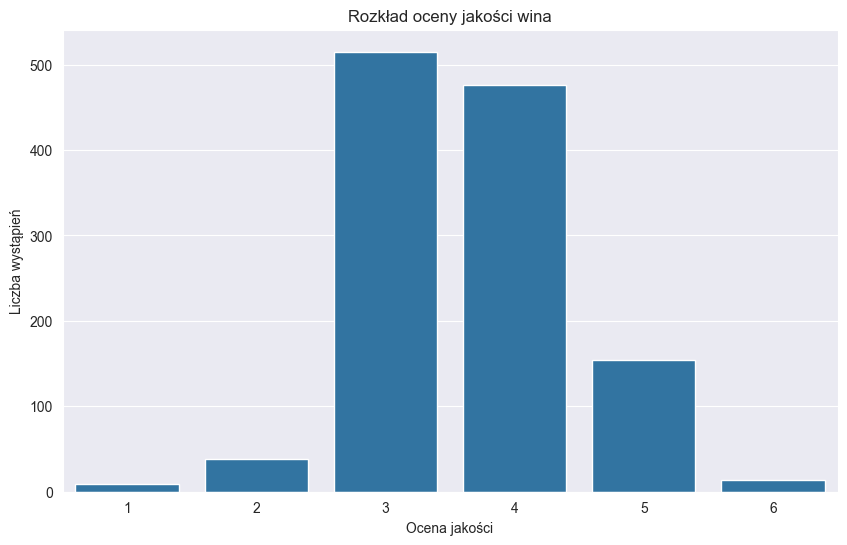

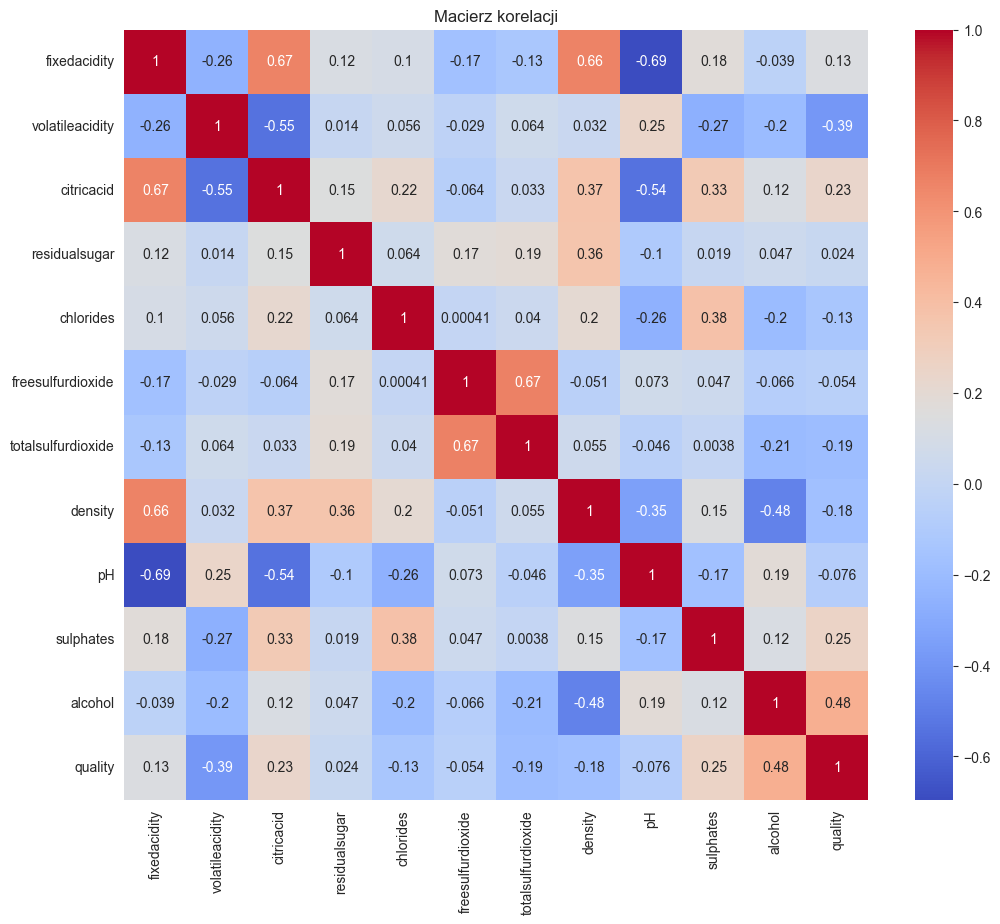

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analiza rozkładu zmiennej celu - jakości wina
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=train_data)
plt.title('Rozkład oceny jakości wina')
plt.xlabel('Ocena jakości')
plt.ylabel('Liczba wystąpień')
plt.show()

# Korelacje między zmiennymi
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
import pprint
import matplotlib.pyplot as plt

In [10]:
# Wczytanie danych
file_path = 'red_wine.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')

In [11]:
# Podział danych na zbiór uczący i testowy
train_data, test_data = train_test_split(df, test_size=0.2, random_state=308303)

# Przygotowanie danych
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

In [12]:
# Definiowanie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Inicjalizacja Grid Search z modelem RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=308303), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Przeprowadzenie doboru hiperparametrów
grid_search.fit(X_train, y_train)

# Najlepszy model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [14]:
# Ocena najlepszego modelu na zbiorze testowym
y_pred_classification = best_model.predict(X_test)

In [15]:
# Inicjalizacja Grid Search z modelem RandomForestRegressor
grid_search_regression = GridSearchCV(
    estimator=RandomForestRegressor(random_state=308303),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Przeprowadzenie doboru hiperparametrów
grid_search_regression.fit(X_train, y_train)

# Najlepszy model
best_model_regression = grid_search_regression.best_estimator_
best_params_regression = grid_search_regression.best_params_

# Ocena najlepszego modelu na zbiorze testowym
y_pred_regression = best_model_regression.predict(X_test)
y_pred_regression_rounded = np.round(y_pred_regression)

In [17]:
# Ocena modeli
accuracy_classification = accuracy_score(y_test, y_pred_classification)
accuracy_regression = accuracy_score(y_test, y_pred_regression_rounded)
mae_classification = mean_absolute_error(y_test, y_pred_classification)
mae_regression = mean_absolute_error(y_test, y_pred_regression_rounded)

In [18]:
# Trafność z dopuszczalnym odstępstwem o 1
accuracy_classification_with_deviation = accuracy_score(y_test, y_pred_classification, normalize=False)
for i, (true, pred) in enumerate(zip(y_test, y_pred_classification)):
    if abs(true - pred) == 1:
        accuracy_classification_with_deviation += 1
accuracy_classification_with_deviation = accuracy_classification_with_deviation / len(y_test)

accuracy_regression_with_deviation = accuracy_score(y_test, y_pred_regression_rounded, normalize=False)
for i, (true, pred) in enumerate(zip(y_test, y_pred_regression_rounded)):
    if abs(true - pred) == 1:
        accuracy_regression_with_deviation += 1
accuracy_regression_with_deviation = accuracy_regression_with_deviation / len(y_test)

In [19]:
# Ważność cech
feature_importances_classification = best_model.feature_importances_
feature_importances_regression = best_model_regression.feature_importances_

In [20]:
# Utworzenie modelu KMeans
kmeans = KMeans(n_clusters=8, random_state=308303, n_init='auto')
kmeans.fit(X_train)

# Przypisanie grup do danych uczących
train_clusters = kmeans.predict(X_train)

# Opis profilu grup
cluster_profiles = X_train.groupby(train_clusters).mean()

# Przypisanie grup do danych testowych
test_clusters = kmeans.predict(X_test)

# Sprawdzenie związku grup z jakością wina w zbiorze testowym
test_data_with_clusters = test_data.copy()
test_data_with_clusters['Cluster'] = test_clusters
cluster_quality_relation = test_data_with_clusters.groupby('Cluster')['quality'].mean()

Liczba przykładów w klastrach w zbiorze uczącym:
6    268
0    264
7    187
3    128
4    119
2    112
5     76
1     52
Name: count, dtype: int64

Liczba przykładów w klastrach w zbiorze testowym:
6    71
0    61
7    50
4    31
3    29
2    27
5    20
1    13
Name: count, dtype: int64


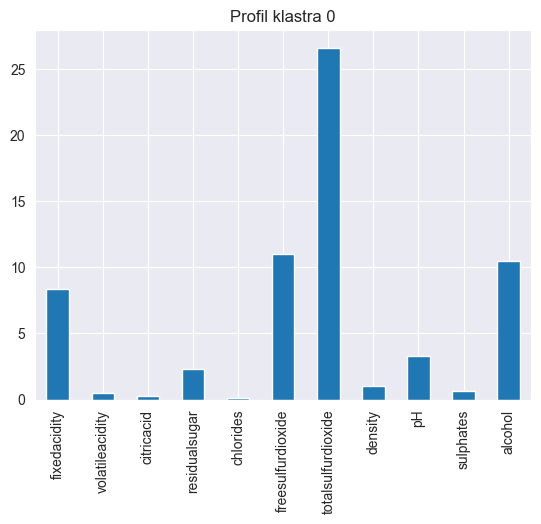

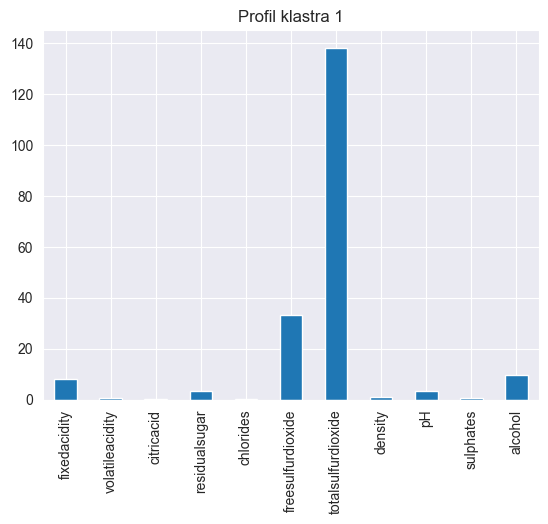

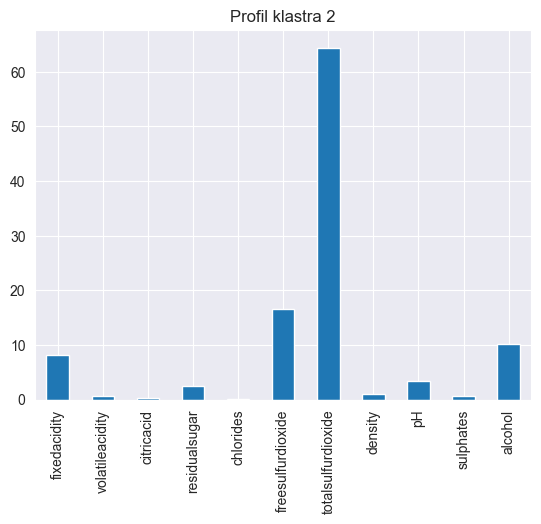

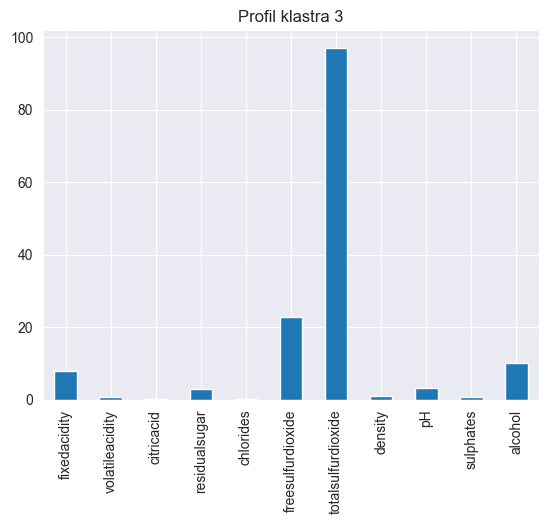

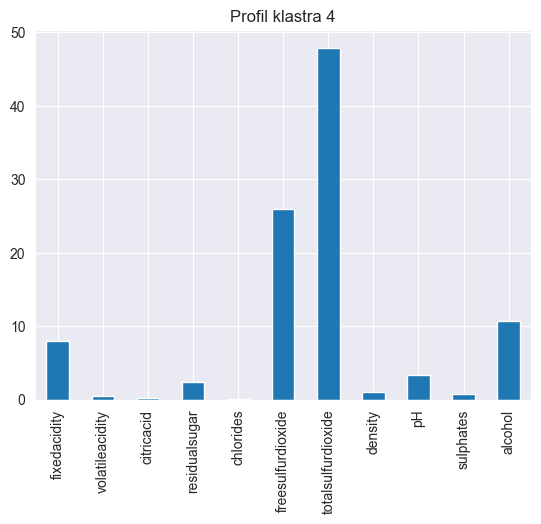

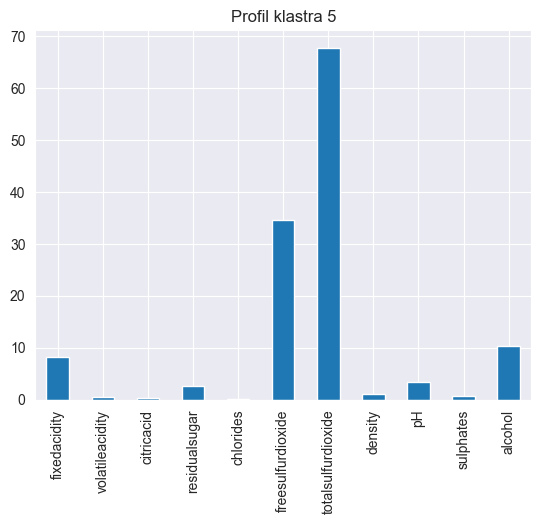

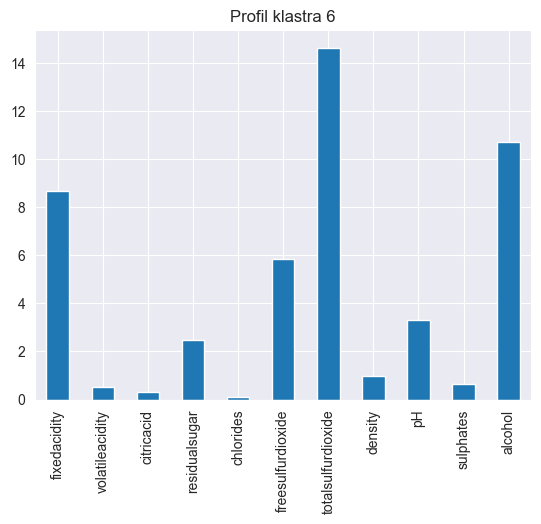

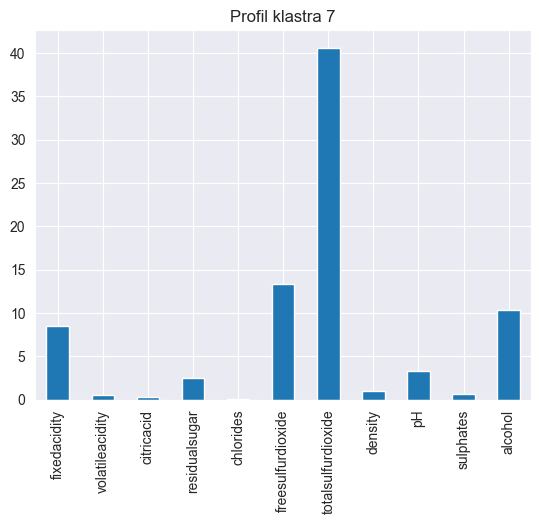

Model klasyfikacji:
Użyte parametry: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Ważność cech:
[('fixedacidity', 0.07635859731510637),
 ('volatileacidity', 0.10305336862141141),
 ('citricacid', 0.07332271897029764),
 ('residualsugar', 0.0688806552560099),
 ('chlorides', 0.08040528156770699),
 ('freesulfurdioxide', 0.06533365124083426),
 ('totalsulfurdioxide', 0.1092281844278142),
 ('density', 0.0890460263374677),
 ('pH', 0.076326689642503),
 ('sulphates', 0.10732565454867585),
 ('alcohol', 0.15071917207217267)]
Trafność: 0.7384105960264901
Trafność z dopuszczalnym odstępstwem o 1: 0.9768211920529801
Średni błąd bezwzględny (MAE): 0.28807947019867547

Model regresji:
Użyte parametry: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Ważność cech:
[('fixedacidity', 0.06434414167119355),
 ('volatileacidity', 0.12355643372640637),
 ('citricacid', 0.0705822451163

In [21]:
# Analiza rozkładu grup w zbiorach uczącym i testowym
train_cluster_counts = pd.Series(train_clusters).value_counts()
test_cluster_counts = pd.Series(test_clusters).value_counts()

print("Liczba przykładów w klastrach w zbiorze uczącym:")
print(train_cluster_counts)
print("\nLiczba przykładów w klastrach w zbiorze testowym:")
print(test_cluster_counts)

# Wizualizacja profilu klastrów
for i in range(8):
    cluster_data = X_train[train_clusters == i]
    cluster_data.mean().plot(kind='bar')
    plt.title(f'Profil klastra {i}')
    plt.show()

# Wyniki
print('Model klasyfikacji:')
print('Użyte parametry:', best_params)
print('Ważność cech:')
pprint.pprint(list(zip(X_train.columns, feature_importances_classification)))
print('Trafność:', accuracy_classification)
print('Trafność z dopuszczalnym odstępstwem o 1:', accuracy_classification_with_deviation)
print('Średni błąd bezwzględny (MAE):', mae_classification)
print('\nModel regresji:')
print('Użyte parametry:', best_params_regression)
print('Ważność cech:')
pprint.pprint(list(zip(X_train.columns, feature_importances_regression)))
print('Trafność:', accuracy_regression)
print('Trafność z dopuszczalnym odstępstwem o 1:', accuracy_regression_with_deviation)
print('Średni błąd bezwzględny (MAE):', mae_regression)
print('\nProfile otrzymanych grup:\n', cluster_profiles)
print('Związek grup z jakością wina:\n', cluster_quality_relation)